ARIMA and Seasonal ARIMA

In [64]:
import numpy as np 
import pandas as pd
import os
import time 
import statsmodels.api as sm
import pandas.tseries.offsets

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv(r'C:\Users\analasa10\Downloads\archive (3)\Perrin Freres monthly champagne sales.csv')

In [6]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
# Cleaning up the data 
df.columns=["Months", "Sales"]
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
# Drop ast 2 rows
df.drop(106, axis=0, inplace=True)

In [10]:
df.tail()

,Months,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [11]:
df.drop(105, axis=0, inplace=True)

In [12]:
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [19]:
# Convert Month into Datetime
df['Months']=pd.to_datetime(df['Months'])

In [20]:
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [21]:
df.set_index('Months',inplace=True)

In [22]:
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [23]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Next Step--->Visualize the Data

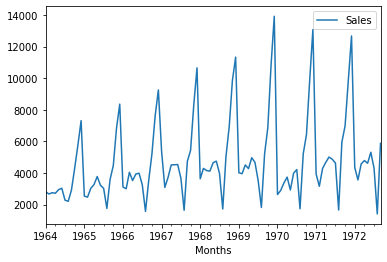

In [24]:
df.plot()

In [25]:
# Testing for stationary
from statsmodels.tsa.stattools import adfuller

In [26]:
test_result=adfuller(df['Sales'])

In [27]:
#Ho: It is non stationary 
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+ ' : ' +str(value))
    if result[1]    <=0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypotheses. Data has no unit root and is stationary ")
    else:
        print("Weak evidence against null hypothese, time series has a unit root indicating it is non-stationary ")

In [28]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothese, time series has a unit root indicating it is non-stationary 


Next Step----> Differencing

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df['Sales'].shift(1)

Months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [31]:
df['Seasonal First Difference']=df['Sales'].shift(12)

In [32]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [34]:
# Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.4459704925533399
p-value : 0.5600498382857083
#Lags Used : 11
Number of Observations Used : 81
Weak evidence against null hypothese, time series has a unit root indicating it is non-stationary 


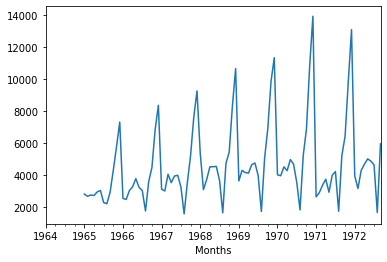

In [35]:
df['Seasonal First Difference'].plot()

Next Step---> Auto Regressive Model

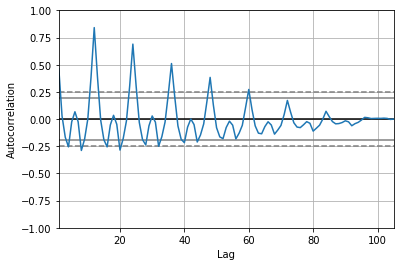

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

Final Thoughts on Autocorrelation and Partial Autocorrelation


Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q

where,
p is AR model lags 
d is  differencing 
q is MA lags



In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\analasa10\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


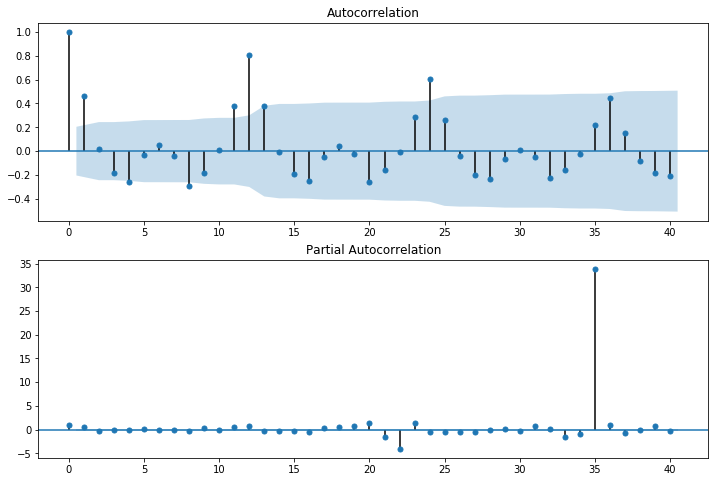

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [48]:
# For non-seasonal data
# p=1, d=1, q= 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [49]:
model = ARIMA(df['Sales'], order = (1,1,1))
model_fit = model.fit()

C:\Users\analasa10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\analasa10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 03 Feb 2021   AIC                           1910.251
Time:                        14:23:37   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.066      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

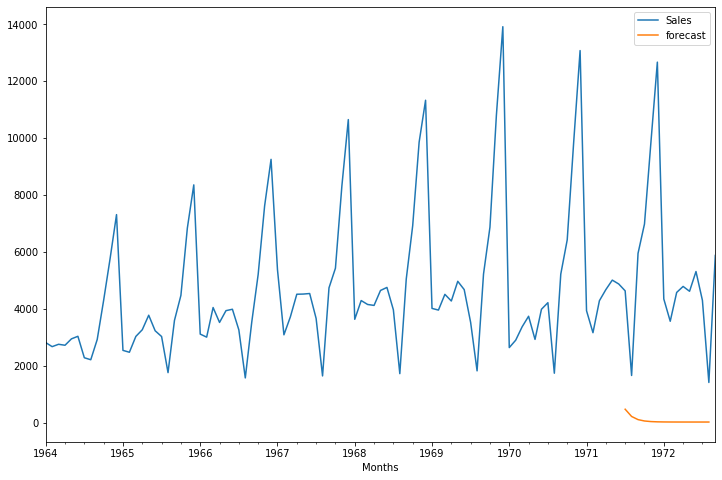

In [56]:
df['forecast']= model_fit.predict(start=90, end=103, dynamic= True)
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [58]:
import statsmodels.api as sm

In [60]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1, 1, 1), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\analasa10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\analasa10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


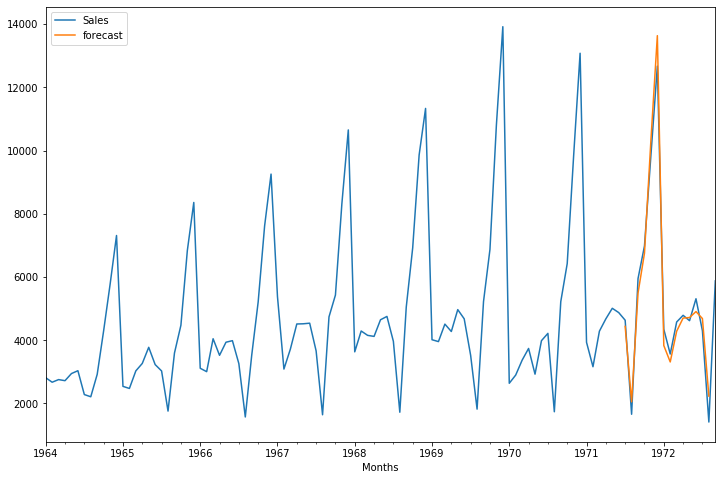

In [61]:
df['forecast'] = results.predict(start=90, end= 103, dynamic = True)
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [67]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [69]:
future_datest_df=pd.DataFrame(index = future_dates[1:], columns =  df.columns)

In [70]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [75]:
future_df = pd.concat([df,future_datest_df])

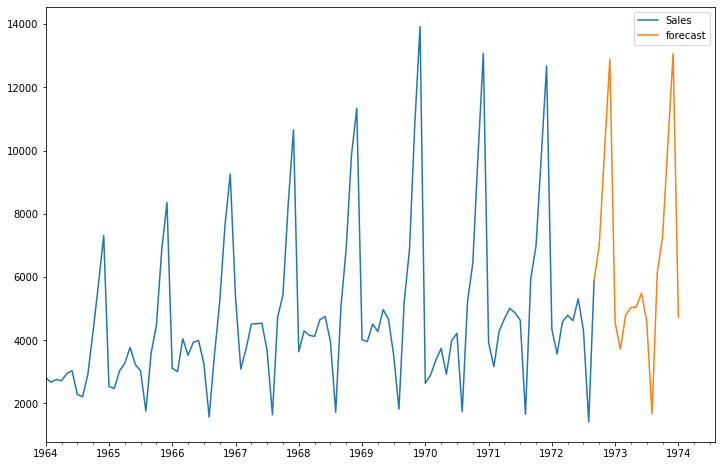

In [76]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales', 'forecast']].plot(figsize=(12,8))